In [1]:
import sys, os
sys.path.insert(0,os.path.abspath('..'))
from scripts.project_functions import *
sns.set_theme(style="whitegrid")
df = load_and_process(r"..\..\data\raw\database.csv")

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# Data Analysis:

### Out of the following categories, which contributes the most towards solved / unsolved cases:
- **Race of the victim**
- **Gender of the victim**
- **Age of the victim**
- **Time of year**




## Race of victim vs solved / unsolved cases

In [2]:
df1 = race_analysis(df)
df1

,Victim Race,Crime Solved,Count
0,Asian/Pacific Islander,No,2916
1,Asian/Pacific Islander,Yes,6972
2,Black,No,101104
3,Black,Yes,198754
4,Native American/Alaska Native,No,919
5,Native American/Alaska Native,Yes,3647
6,White,No,82208
7,White,Yes,235159


<AxesSubplot:xlabel='Victim Race', ylabel='Count'>

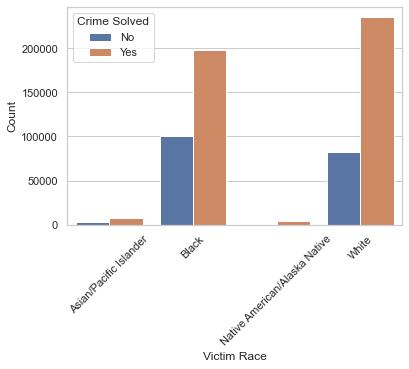

In [3]:
plt.xticks(rotation=45)
sns.barplot(data=df1,y='Count',x='Victim Race', hue = 'Crime Solved')

#### Observation:
From this, we can see that although there is a larger number of victims of the white race than any other in this dataset, the number of unsolved cases for the black race is larger, suggesting race as a possible factor in solving a case. Because the numbers for Asian / Pacific Islanders as well as Native American / Alaskan Natives are too small, let's take a closer look at the solved vs unsolved cases for these.

<AxesSubplot:xlabel='Victim Race', ylabel='Count'>

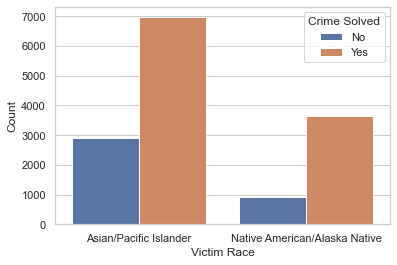

In [4]:
sns.barplot(data=df1.loc[lambda x: x['Victim Race'] != 'Black'].loc[lambda x: x['Victim Race'] != 'White'],y='Count',x='Victim Race', hue = 'Crime Solved')

#### Further Observations:
From this, we can closer get an idea of the distribution between solved and unsolved cases for these groups. In order to take a closer look, we should calculate the percentage of cases solved for each race to see if there is a trend. 

Some hand calculations result in the following values for percentage solved:
- *Asian / Pacific Islander Percentage*: **70.5 % solved**
- *Black*: **66.3% solved**
- *Native American / Alaska Native*: **79.9% solved**
- *White*: **74.1% solved**

From this, it appears that most races have a percentage of solved cases within ± 10% of each other, which although seeming reasonable becomes odd when considering the total number of victims per race.

Total Victims: 
- *Asian / Pacific Islander Percentage*: **9,888**
- *Black*: **299,858**
- *Native American / Alaska Native*: **4,566**
- *White*: **317,367**

Due to the number of cases, the percentile of solved cases per race becomes less impressive, as there is still an 80% solve rate for the white race, but other races with much less victims still have a lower percent of cases solved.


## Gender of victim vs solved / unsolved cases

In [5]:
df2 = gender_analysis(df)
df2

,Victim Sex,Crime Solved,Count
0,Female,No,32532
1,Female,Yes,109461
2,Male,No,154615
3,Male,Yes,335071


<AxesSubplot:xlabel='Victim Sex', ylabel='Count'>

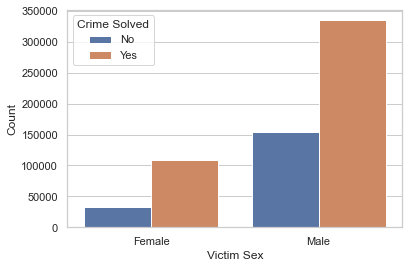

In [6]:
sns.barplot(data=df2,y='Count',x='Victim Sex', hue = 'Crime Solved')

#### Observation:

This graph depicts the distribution of solved vs unsolved cases for the sex of the victim. From this we can see that there is in general less victims which are females. In order to take a closer more precise look, we can again look at the percentages for each gender.

The hand calculated percentages are shown below:
- *Female*: **77.1% Solved** 
- *Male*: **68.4% Solved**

Again comparing this against the total number of victims for each gender can give us some context for these percentages.
- *Female*: **141,993** 
- *Male*: **489,686**

Although there are *29%* less female victims than male victims, the number of solved cases is only approximately 9% higher, suggesting the gender is possibly a factor in whether or not a case gets solved. An interesting investigation to do from this would be to analyze whether or not cases involving victims that are females of minority races are solved less.   


## Analysis of both race and gender

In [7]:
df3 = racegender_analysis(df)
df3

,Victim Race,Victim Sex,Crime Solved,Count
0,Asian/Pacific Islander,Female,No,604
1,Asian/Pacific Islander,Female,Yes,2349
2,Asian/Pacific Islander,Male,No,2312
3,Asian/Pacific Islander,Male,Yes,4623
4,Black,Female,No,14165
5,Black,Female,Yes,37918
6,Black,Male,No,86939
7,Black,Male,Yes,160836
8,Native American/Alaska Native,Female,No,238
9,Native American/Alaska Native,Female,Yes,980


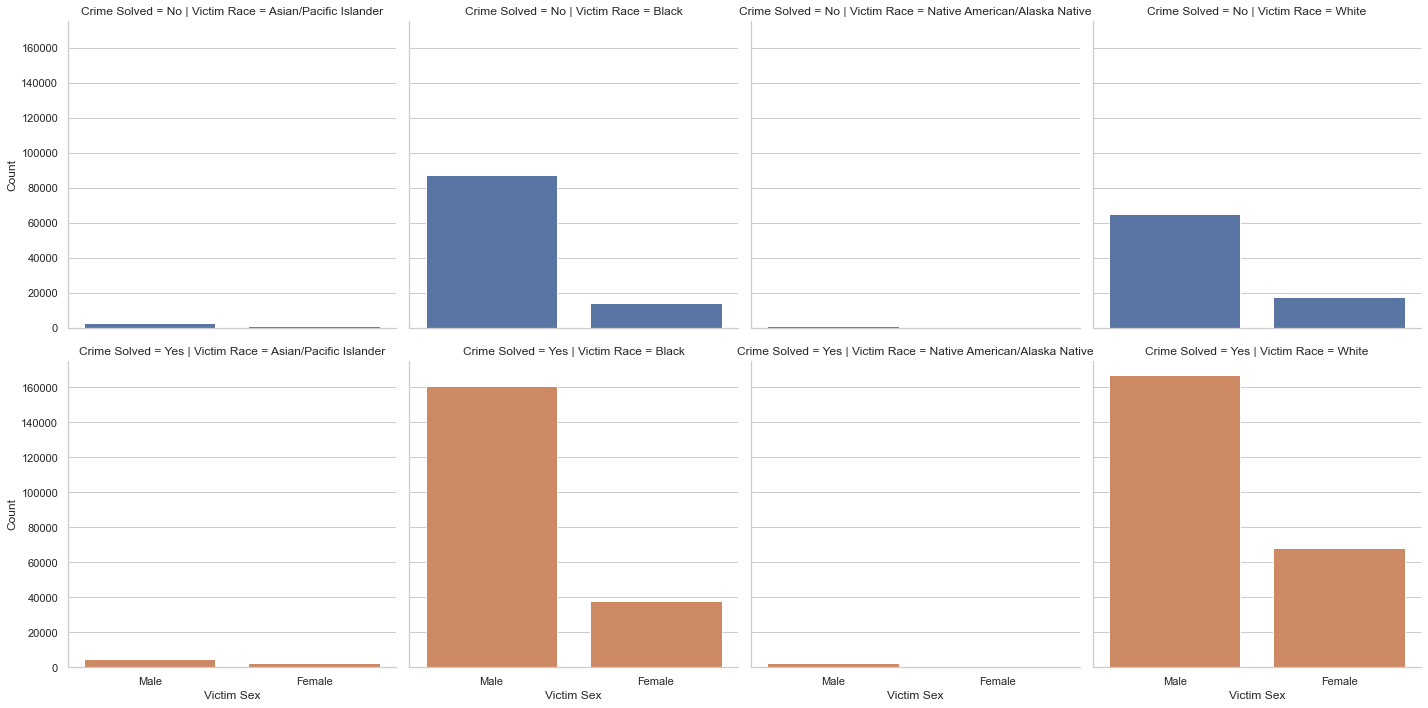

In [8]:
g = sns.FacetGrid(df3, col="Victim Race",row='Crime Solved',hue = 'Crime Solved' ,height=5, aspect=1)
g.map(sns.barplot, "Victim Sex", "Count", order=["Male", "Female"])
#g.set(ylim=(0, 100000))

#### Initial observations:

As we know, there are more male victims than female overall within this dataset, and although cases with female victims are solved 9% more, investigating the ratio for more minority groups can give us a better idea of the potential correlation between gender, race, and if the case gets solved. This view of the dataset can provide us with a couple predictions:
- In relation to solved cases involving a female victim, there is approximately 20% to 50% less unsolved cases involving female victims of that race
- The percentage of unsolved cases is the highest with cases involving black male victims
- Cases involving minority males are solved less, despite cases involving white males being solved the most

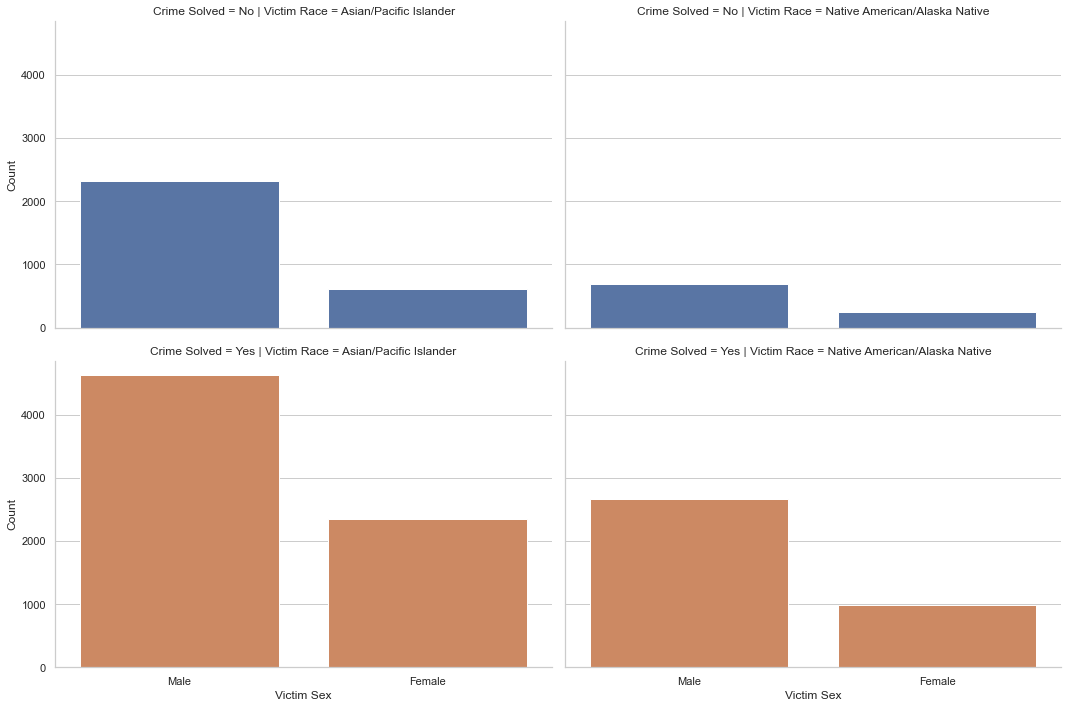

In [9]:
g = sns.FacetGrid(data =df3.loc[lambda x: x['Victim Race']!='White'].loc[lambda x: x['Victim Race']!='Black'], col="Victim Race",row='Crime Solved',hue = 'Crime Solved' ,height=5, aspect=1.5)
g.map(sns.barplot, "Victim Sex", "Count", order=["Male", "Female"])
#g.set(ylim=(0, 100000))

#### Closer look:

On average, it appears that throughout the minority races, approximately 75% less cases involving female victims go unsolved compared to cases involving male victims. This contradicts our original estimate of 20-50%. Although this data is not entirely conclusive - it would be reasonable to say that the chances of a murder being solved when the victim is female are higher than if the victim were to be male, regardless of race.

#### Exploring Further:

- The percentage of unsolved cases is the highest with cases involving black male victims
- Cases involving minority males are solved less, despite cases involving white males being solved the most

These previous observations which were made above suggest that murders involving males of minority races are less likely to be solved, we will investigate this.

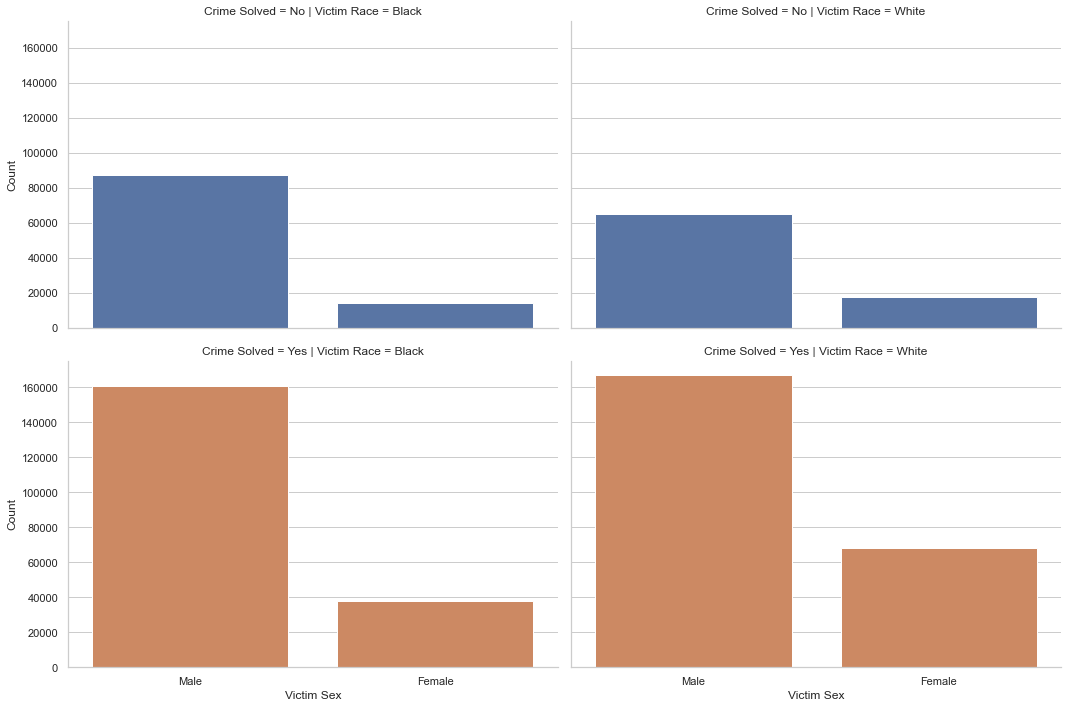

In [11]:
g = sns.FacetGrid(data =df3.loc[lambda x: x['Victim Race']!='Asian/Pacific Islander'].loc[lambda x: x['Victim Race']!='Native American/Alaska Native'], col="Victim Race",row='Crime Solved',hue = 'Crime Solved' ,height=5, aspect=1.5)
g.map(sns.barplot, "Victim Sex", "Count", order=["Male", "Female"])

#### Observation:

From this, we can clearly see that even though there are fewer cases in total involving black males, the number of unsolved cases is nearly 25% larger when compared to cases involving white males. 

Although this evidence is not entirely conclusive, this suggests that race is potentially a factor determining whether a case is solved when the victim is male (Although, race may also be a factor when the victim is female as well, however, our previous observation seems to suggest otherwise) 

## Year of Crime vs Solved & Unsolved Cases

In [12]:
dfYear = year_analysis(df)
dfYear

,Year,Crime Solved,Count
0,1980,No,6061
1,1980,Yes,16369
2,1981,No,5349
3,1981,Yes,15724
4,1982,No,5431
...,...,...,...
65,2012,Yes,10467
66,2013,No,4333
67,2013,Yes,9948
68,2014,No,4309


## Let's begin by looking at a heatmap of solved vs unsolved by year
This will give us some darker spots to look for and see any patterns by year

<AxesSubplot:xlabel='Crime Solved', ylabel='Year'>

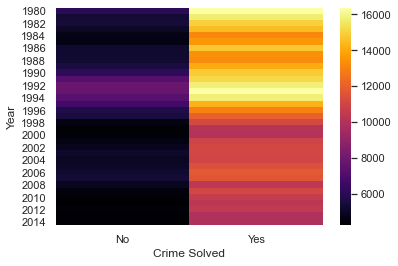

In [13]:
dfYear2 = dfYear.pivot_table(index='Year', columns='Crime Solved', values='Count')
sns.heatmap(dfYear2, cmap='inferno', linecolor='white')

##### Observations:
It seems as if a great percentage of crimes are solved more than not but we can spot out some observations from this heat map such as:
- A period from 1990 - 1996 where murder was very numerous, solved or not
- During the 1980s murder was solved more often than not
- Post 1996 while murder rates dropped so did the amount of solved cases, you can see a more purple hue in the Yes column and a more purple hue in the No column

### Let's confirm our suspictions with a bar graph to see if crime rates fell yet crime stayed unsolved post 1996

<AxesSubplot:xlabel='Year', ylabel='Count'>

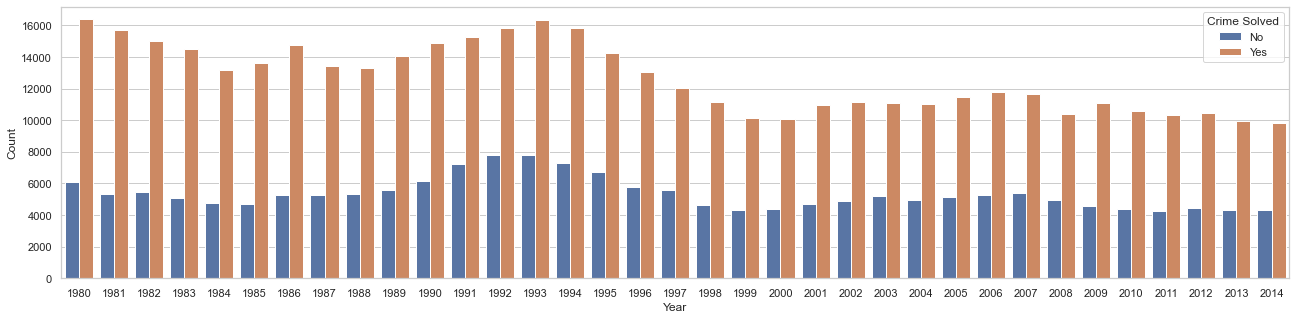

In [14]:
fig_dims = (22, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=dfYear,y='Count',x='Year', hue = 'Crime Solved', ax=ax)

### As we predicted! Crime rate fell and the Orange solved bar fell with it but the unsolved bar stayed relatively consistent
We can see from this that indeed...
## Year does affect solved vs unsolved cases!
It seems that the ratio of solved to unsolved cases pre-1996 was consistent but after the crime wave of 1988 to 1996 it began to take on a more 50/50 approach.

 ## Age of victim vs solved and unsolved cases

In [15]:
df2=victim_age_analysis(df)
df2

,Victim Age,Crime Solved,Count
0,0,No,910
1,0,Yes,7309
2,1,No,506
3,1,Yes,4962
4,2,No,313
...,...,...,...
197,98,Yes,24
198,99,No,4040
199,99,Yes,4196
200,998,No,75


<AxesSubplot:xlabel='Victim Age', ylabel='Count'>

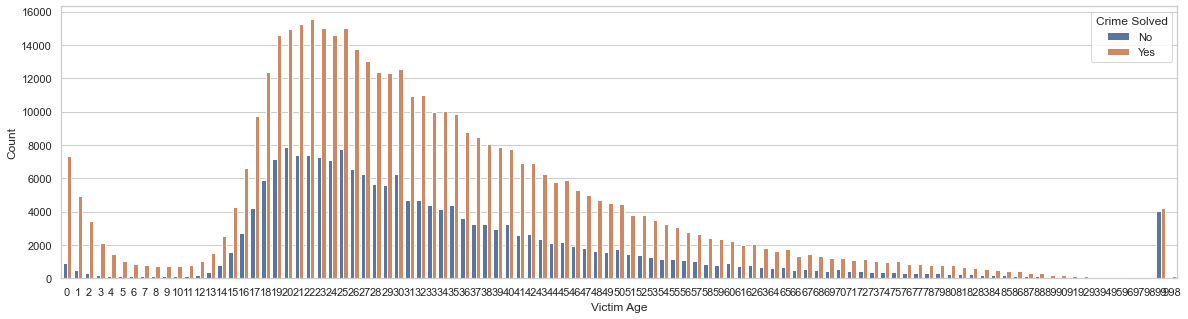

In [16]:
dimension = (20, 5)
fig, ax = plt.subplots(figsize=dimension)
sns.barplot(data=df2,y='Count',x='Victim Age', hue = 'Crime Solved', ax=ax)

#### Observation:
From this graph, we can see that there is a high frequency of murders of infants, this frequency decreases throughout childhood years but peaks again around adulthood (early to mid 20s) then the frequence of murders experiences a gradual decrease as age increases

There is a slight peek at the age of 99. This could mean that seniors are more likely targeted, or this could be a unique way for agencies to log information (unknown age would be logged as 99 by default)


<AxesSubplot:xlabel='Victim Age', ylabel='Count'>

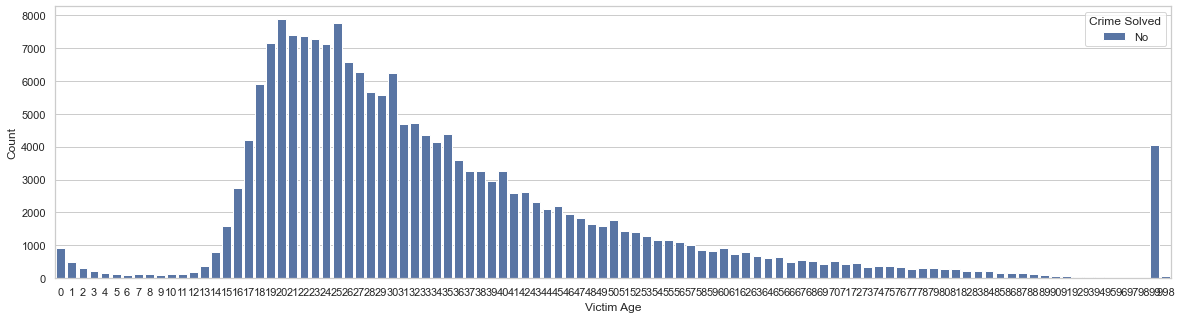

In [17]:
unsolved = df2.loc[df2['Crime Solved'] == 'No']
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)

#solved crimes frequency for victim age
sns.barplot(data=unsolved,y='Count',x='Victim Age', hue = 'Crime Solved', ax=ax)

#### Examining unsolved cases based on victim age:
Ages with the most unsolved cases range from late teenage years to mid twenties, this gradually decreases as age increases. There are slight peaks for babies and elderly people. This mostly looks like it correlates to the to the number of solved crimes based on victim age, however the peak for unsolved cases of infants is a lot lower. 

# Summary:

### Is there a trend between race, sex, age of either either victim or perpetrator that correlates to a case being solved?
    
Our findings suggest that when looking at a trend between race and sex of the victim we can conclude the following:
    
- Despite having lower total cases, the percent of cases solved for minority groups is smaller. The exception is Native American / Alaska Native cases, where the percentage of cases solved is 79% - this number is only 5% larger than the number of solved cases for victims of the white race, yet the total number of victims of Native American / Alaska Native descent is 4,566 compared to 317,367 cases for white victims. This suggests that race may have a significant impact on the outcome of a murder case.
- Although there are 29% less female victims than male victims, the number of solved cases is only approximately 9% higher, suggesting the gender is possibly a factor in whether or not a case gets solved. Contradictory to this, when comparing male to female cases solved for each race, the data suggests that female victims are more likely to have their cases solved - implying other factors may be a larger driving force than purely the gender of the victim.
- Despite having less total victims, the number of unsolved cases for black males is nearly 25% larger when compared to cases involving white males. Although there are numerous other potential factors which could be at play, this implies males of minority groups have a lower chance of their  
    

### Is there a trend between solved and unsolved cases from 1980 to 2014?


### ~~What was the socioeconomic situation of the city/state at the time of the homicide and could this affect whether or not a crime was solved?~~

### ~~Is there a difference between red states and blue states regarding solved cases, and what are the factors that contribute to this difference?~~

Unfortunately, due to time constraints and underestimation of the complexity of these questions, we had to abandon these two research questions, however, out of personal interests, this is something we might come back to and explore in our own time.